Text(0.5, 1.0, 'Vertical Position with Air Resistance')

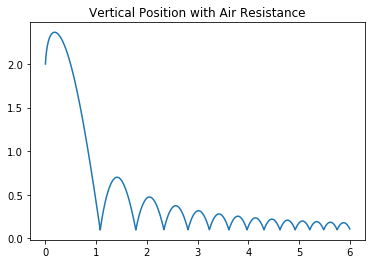

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
# initializing all coniditions
m = 0.2 # mass in kg
g = 9.81 # gravitational acceleration m/s/s
h = 2 # initial height in m
vx0 = 100 # velocity in x-direction m/s
vy0 = 10 # velocity in y-direction m/s
D = 0.1 # drag coefficient
R = 0.1 # radius of ball in m
k = 1000 # spring constant of ball N/m
t0 = 0 # initial start time in sec
tf = 6 # final time in sec
dt = 0.001 # time differential
# initializing all arrays necesarry to perform the calculation
time = np.arange(t0,tf,dt) 
posx = np.zeros(len(time)) # x-position
posy = np.zeros(len(time)) # y-position
velx = np.zeros(len(time)) # velocity in x-direction
vely = np.zeros(len(time)) # velocity in y-direction
accelx = np.zeros(len(time)) # acceleration in x-direction
accely = np.zeros(len(time)) # acceleration in y-direction
# setting the initial array values to the inititial conditions we defined above
posy[0] = h
velx[0] = vx0
vely[0] = vy0
# here we used the standard Euler method to perform the calculations to find the position of the ball
for i in range(len(time)-1):
    # y and x acceleration are different since the gravitational acceleration is only present in the y-direction
    accely[i] = -g - D/m*((velx[i]**2+vely[i]**2)**(0.5))*vely[i] 
    accelx[i] = -D/m*((velx[i]**2+vely[i]**2)**(0.5))*velx[i] # acceleration due to air resistance
    normaccel = np.zeros(len(time)) # acceleration when the ball hits the ground
    # if y-position is less than the balls radius then the ball will be hitting the ground and bouncing up
    # this section is for when the ball is hitting the ground and bouncing up
    if posy[i] < R:
        normaccel[i+1] = -k/m*(R-posy[i])
        accely[i+1] =  -accely[i] - normaccel[i]
        vely[i+1] = -vely[i] + accely[i]*dt
        posy[i+1] = posy[i] - vely[i]*dt
    # when the ball is not hitting the ground
    else:
        vely[i+1] = vely[i] + accely[i]*dt
        velx[i+1] = velx[i] + accelx[i]*dt
        accely[i+1] = accely[i] + (-g - D/m*((velx[i]**2+vely[i]**2)**(0.5))*vely[i])*dt
        accelx[i+1] = accelx[i] -D/m*((velx[i]**2+vely[i]**2)**(0.5))*velx[i]*dt 
        posy[i+1] = posy[i] + vely[i]*dt
        posx[i+1] = posx[i] + velx[i]*dt
    # once the ball is done bouncing it won't go through the floor so once posy < 0, the simulation is over
    if posy[i+1] < 0:
        break
# plotting the motion
plt.plot(time, posy)
plt.title('Vertical Position with Air Resistance')

Here in this simulation we assumed that the bouncing force of the ball could be modeled as that of a spring force, hence why I defined a spring constant, k, in the code above.